In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline
import re

In [ ]:
1.missing value
2.All the numerical variables
3.distribution of the numerical varibles
4.categrorical variables
5.outliers
6.relationship  between independent and dependent features

In [3]:
data = pd.read_csv("anime.csv")

In [5]:
data.head()

,names,time_line,gener,votes,runtime
0,Kaubôi bibappu,(1998–1999),"Animation,Action,Adventure","123,949",24 min
1,Steins;Gate,(2011–2015),"Animation,Comedy,Drama","64,904",24 min
2,Rurouni Kenshin: Meiji Kenkaku Romantan: Tsuio...,(1999),"Animation,Action,Adventure","15,217",118 min
3,Kenpuu Denki Berserk,(1997–1998),"Animation,Action,Adventure","42,353",23 min
4,Baccano!,(2007–2008),"Animation,Action,Adventure","12,112",384 min


In [6]:
data.tail()

,names,time_line,gener,votes,runtime
95,Kimagure orenji rôdo,(1985–1988),"Animation,Comedy,Drama",872,NaN
96,Mirai nikki,(2011–2013),"Animation,Action,Drama","18,265",NaN
97,Koi kaze,(2004),"Animation,Drama,Romance",448,NaN
98,Tekunoraizu,(2003),"Animation,Drama,Sci-Fi","2,890",NaN
99,Yojôhan shinwa taikei,(2010),"Animation,Comedy,Drama","4,444",NaN


In [7]:
data.shape

(100, 5)

In [8]:
data.sample(10)

,names,time_line,gener,votes,runtime
28,Shin seiki evangerion,(1995–1996),"Animation,Action,Drama","73,508",25 min
21,Ashita no Jô,(1970–1971),"Animation,Action,Drama",662,24 min
15,Vinland Saga,(2019– ),"Animation,Action,Adventure","45,433",24 min
24,Romio no aoi sora,(1995),"Animation,Adventure,Drama","1,195",25 min
31,Tengen toppa gurren lagann,(2007),"Animation,Action,Adventure","19,059",24 min
11,Rurôni Kenshin - Meiji kenkaku romantan,(1996–1998),"Animation,Action,Adventure","19,688",24 min
26,Darker Than Black: Kuro no keiyakusha,(2007–2010),"Animation,Action,Drama","12,052",23 min
68,Mononoke,(2007),"Animation,Fantasy,Horror","2,459",30 min
40,Ôkami to kôshinryô,(2008–2009),"Animation,Adventure,Fantasy","4,614",25 min
82,Trigun,(1998),"Animation,Action,Adventure","22,585",165 min


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   names      100 non-null    object
 1   time_line  100 non-null    object
 2   gener      100 non-null    object
 3   votes      100 non-null    object
 4   runtime    93 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [11]:
# chacking duplicate
data[data.duplicated()]

,names,time_line,gener,votes,runtime


In [12]:
data.columns

Index(['names', 'time_line', 'gener', 'votes', 'runtime'], dtype='object')

In [39]:
data['votes'] = data['votes'].str.replace(",","")

In [41]:
data['votes'] = data['votes'].astype(int)

In [44]:
data["runtime"] = data["runtime"].str.replace("min","") 

In [46]:
data["runtime"] = data["runtime"].astype("float")

In [48]:
data.dtypes

names         object
time_line     object
gener         object
votes          int32
runtime      float64
dtype: object

In [100]:
data["time_line"] = data["time_line"].str.extractall('(\d+)').reset_index(drop=True)[0]

In [102]:
data["time_line"] = pd.to_datetime(data["time_line"])

In [103]:
data.dtypes

names                object
time_line    datetime64[ns]
gener                object
votes                 int32
runtime             float64
dtype: object

In [104]:
data.head()

,names,time_line,gener,votes,runtime
0,Kaubôi bibappu,1998-01-01,"Animation,Action,Adventure",123949,24.0
1,Steins;Gate,1999-01-01,"Animation,Comedy,Drama",64904,24.0
2,Rurouni Kenshin: Meiji Kenkaku Romantan: Tsuio...,2011-01-01,"Animation,Action,Adventure",15217,118.0
3,Kenpuu Denki Berserk,2015-01-01,"Animation,Action,Adventure",42353,23.0
4,Baccano!,1999-01-01,"Animation,Action,Adventure",12112,384.0


In [105]:
data["runtime"].unique()

array([ 24., 118.,  23., 384.,  25.,  30., 316.,  20., 151., 360.,  28.,
       701.,  50., 165.,  26., 253.,  nan])

In [107]:
data.isnull().sum()

names        0
time_line    0
gener        0
votes        0
runtime      7
dtype: int64

In [117]:
nan_features = list(data.columns[data.isnull().sum() >= 1])

In [120]:
np.round(data[nan_features].isnull().mean()*100)

runtime    7.0
dtype: float64

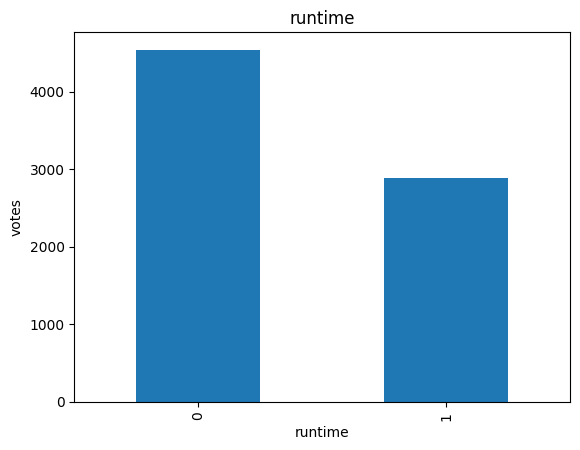

In [121]:
## ploting nan value with votes and see relationship
df = data.copy()
for i in nan_features:
    df[i] = np.where(df[i].isnull(),1,0)
    df.groupby(i)["votes"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("votes")
    plt.title(i)
    plt.show()   

In [133]:
# numerical values
numeric_features = data[data.dtypes[data.dtypes != "object"].index]

In [135]:
numeric_features.head()

,time_line,votes,runtime
0,1998-01-01,123949,24.0
1,1999-01-01,64904,24.0
2,2011-01-01,15217,118.0
3,2015-01-01,42353,23.0
4,1999-01-01,12112,384.0


In [137]:
# Tempora; variables(EG: Date, time variable)
# fatch time feature 
time_features = [i for i in numeric_features if "ti" in i or "time" in i]

In [141]:
for i in time_features:
    print(i,df[i].unique())

time_line ['1998-01-01T00:00:00.000000000' '1999-01-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '1979-01-01T00:00:00.000000000'
 '1980-01-01T00:00:00.000000000' '1988-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '2004-01-01T00:00:00.000000000'
 '1986-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '1971-01-01T00:00:00.000000000' '1972-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '1993-01-01T00:00:00.000000000'
 '2002-01-01T00:00:00.000000000' '1970-01-01T00:00:00.000000000'
 '1995-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '1989-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '1983-01-01T00:00:00.000000000'
 '2009-01-01T00

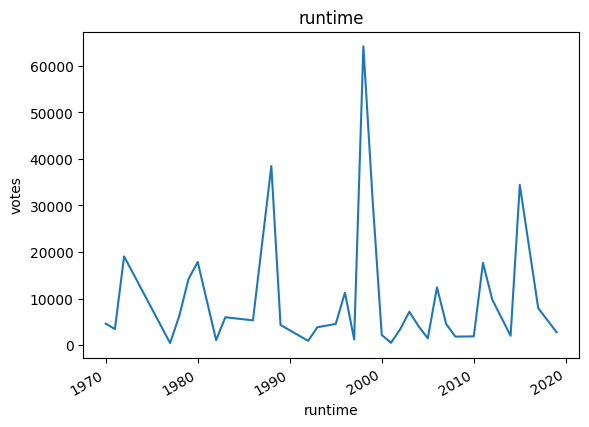

In [143]:
df.groupby("time_line")["votes"].median().plot()
plt.xlabel(i)
plt.ylabel("votes")
plt.title(i)
plt.show()   


In [149]:
## numerical vdriable 2type
## continuous variable and discrit variable
discrit_features = [i for i in numeric_features if len(data[i].unique()) <= 25]

In [150]:
discrit_features

['runtime']

In [151]:
data[discrit_features]

,runtime
0,24.0
1,24.0
2,118.0
3,23.0
4,384.0
...,...
95,NaN
96,NaN
97,NaN
98,NaN


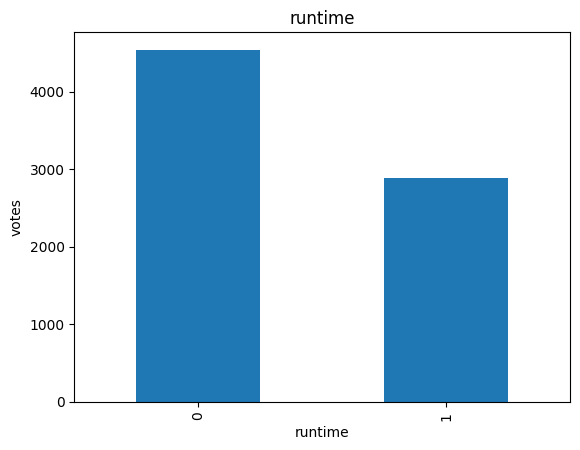

In [152]:
for i in discrit_features:
    df.groupby(i)["votes"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("votes")
    plt.title(i)
    plt.show()   

    

In [154]:
# continous variable
continous_features = [i for i in numeric_features if i not in discrit_features+time_features]

In [156]:
data[continous_features].head()

,votes
0,123949
1,64904
2,15217
3,42353
4,12112


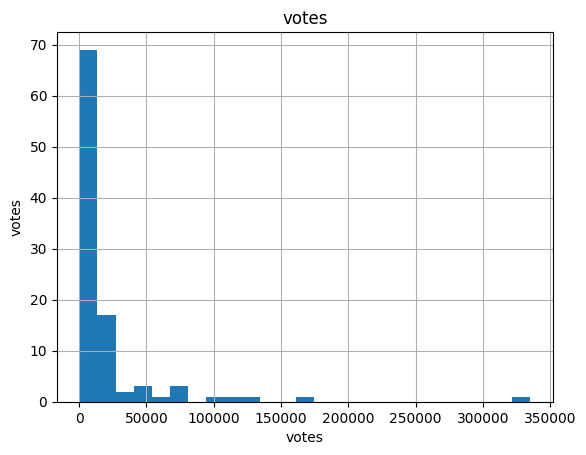

In [158]:
for i in continous_features:
    df[i].hist(bins=25) 
    plt.xlabel(i)
    plt.ylabel("votes")
    plt.title(i)
    plt.show()   

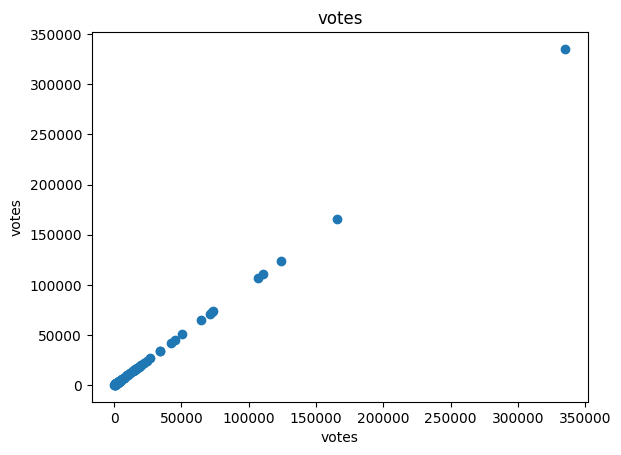

In [159]:
#transmorm data
for i in continous_features:
    if 0 in df[i].unique():
        pass
    else:
        df[i] = np.log(df[i])
        plt.scatter(data[i],data["votes"])
        plt.xlabel(i)
        plt.ylabel("votes")
        plt.title(i)
        plt.show()   
        

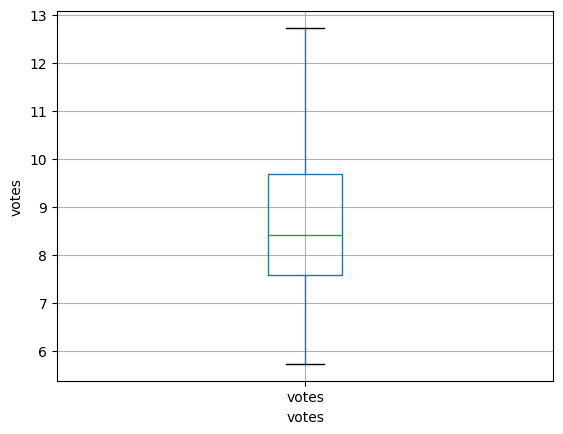

In [161]:
# outlayers
for i in continous_features:
    if 0 in df[i].unique():
        pass
    else:
        df.boxplot(column=i)
        plt.xlabel(i)
        plt.ylabel(i)    
        plt.show()
        

<AxesSubplot:xlabel='votes', ylabel='Count'>

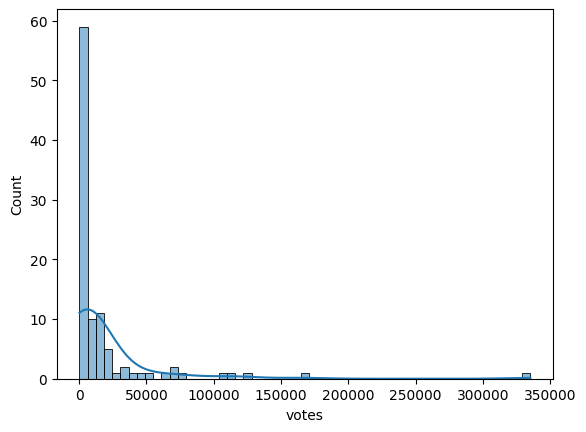

In [163]:
sns.histplot(data["votes"],kde=True)

In [166]:
catigorical_features = data[data.dtypes[data.dtypes == "object"].index]

In [170]:
for i in catigorical_features:
    print(f"the features name is {i} and number of catiogary are {len(data[i].unique())}")

the features name is names and number of catiogary are 100
the features name is gener and number of catiogary are 21


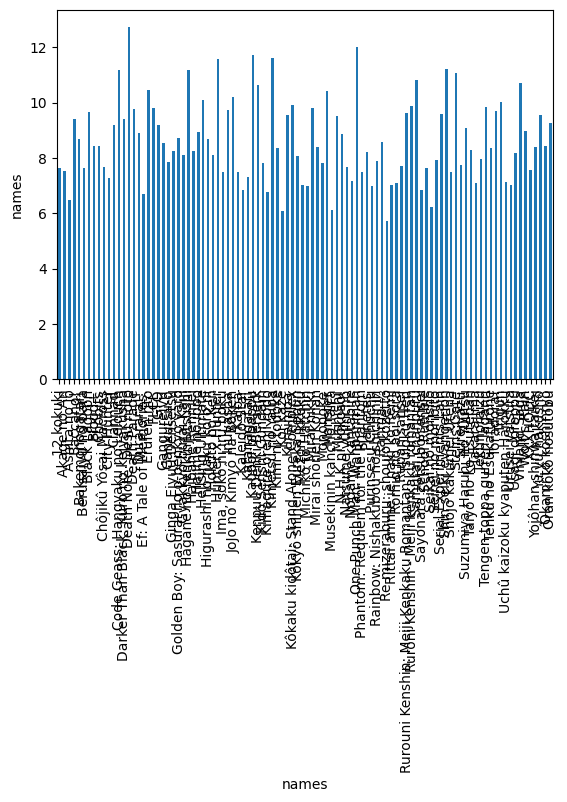

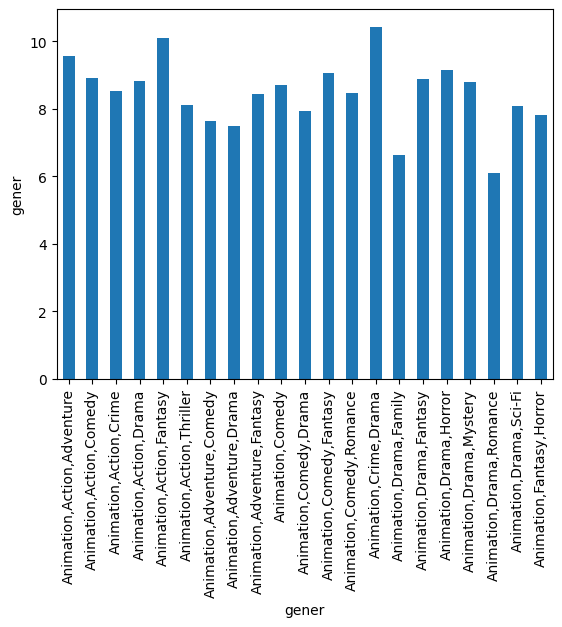

In [172]:
# find relationship between catogrtical  and votes
for i in catigorical_features:
    df.groupby(i)["votes"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel(i)    
    plt.show()
        
    

In [179]:
top10_annime = data.sort_values(by="votes",ascending=False).head(10)

In [180]:
top10_annime

,names,time_line,gener,votes,runtime
17,Death Note: Desu nôto,2011-01-01,"Animation,Crime,Drama",335110,23.0
22,One Punch Man: Wanpanman,1998-01-01,"Animation,Action,Comedy",165755,24.0
0,Kaubôi bibappu,1998-01-01,"Animation,Action,Adventure",123949,24.0
35,Kimetsu no Yaiba,1996-01-01,"Animation,Action,Adventure",110924,316.0
9,Hunter x Hunter,2005-01-01,"Animation,Action,Adventure",106937,24.0
28,Shin seiki evangerion,1988-01-01,"Animation,Action,Drama",73508,25.0
33,Hagane no renkinjutsushi,2007-01-01,"Animation,Action,Adventure",72575,25.0
23,Code Geass: Hangyaku no Lelouch,2004-01-01,"Animation,Action,Drama",71074,24.0
1,Steins;Gate,1999-01-01,"Animation,Comedy,Drama",64904,24.0
80,Samurai chanpurû,2004-01-01,"Animation,Action,Adventure",50614,24.0


<AxesSubplot:xlabel='votes', ylabel='names'>

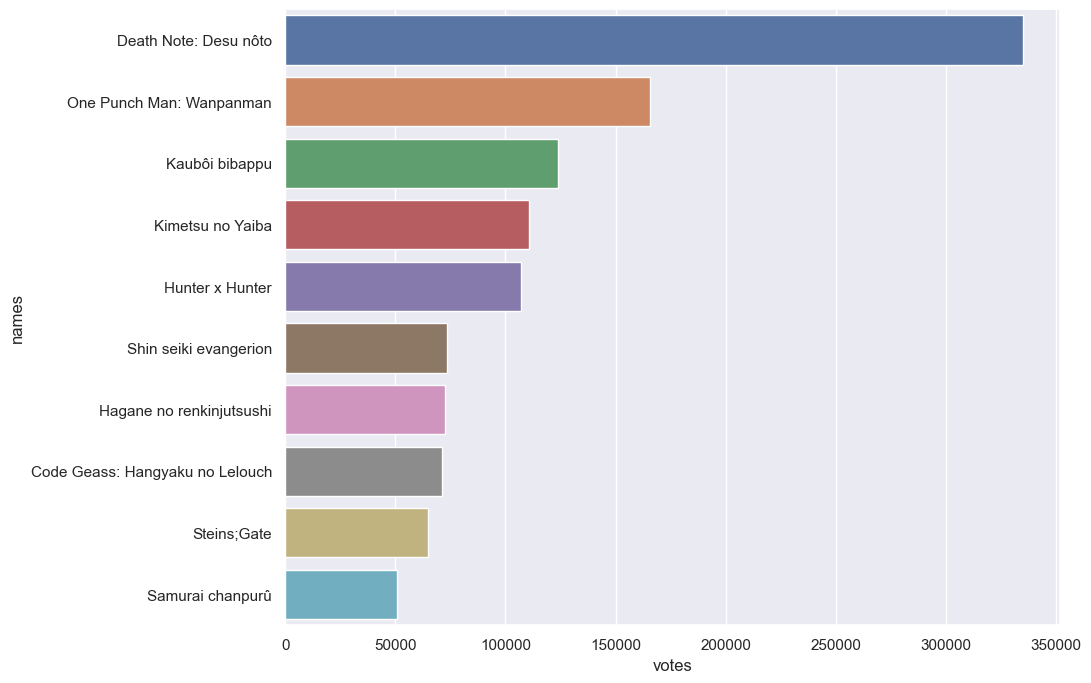

In [184]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(x = "votes",y="names",data=top10_annime)

<AxesSubplot:xlabel='runtime', ylabel='names'>

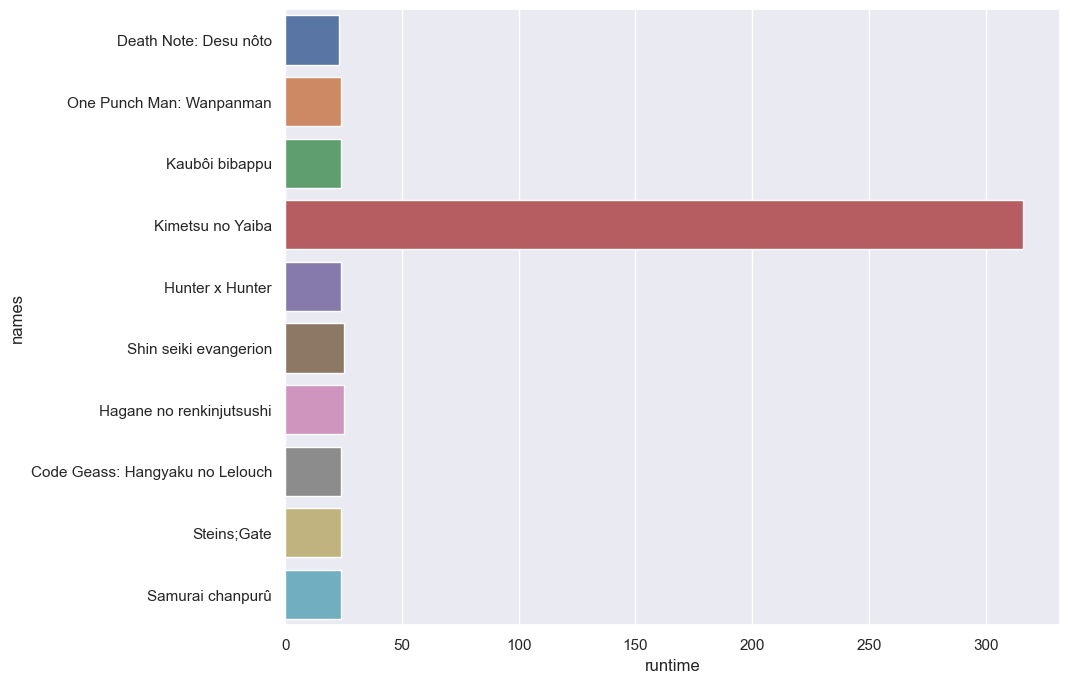

In [185]:
sns.barplot(x = "runtime",y="names",data=top10_annime)

In [197]:
data["year"] = data["time_line"].dt.year

In [201]:
per_year = data.groupby("year",as_index=False).size()

In [213]:
per_year.index = pd.CategoricalIndex(per_year["year"],ordered=True)

In [215]:
per_year.head(10)

,year,size
year,,
1970,1970,1
1971,1971,2
1972,1972,1
1977,1977,1
1978,1978,2
1979,1979,2
1980,1980,2
1982,1982,1
1983,1983,1


<AxesSubplot:xlabel='year', ylabel='size'>

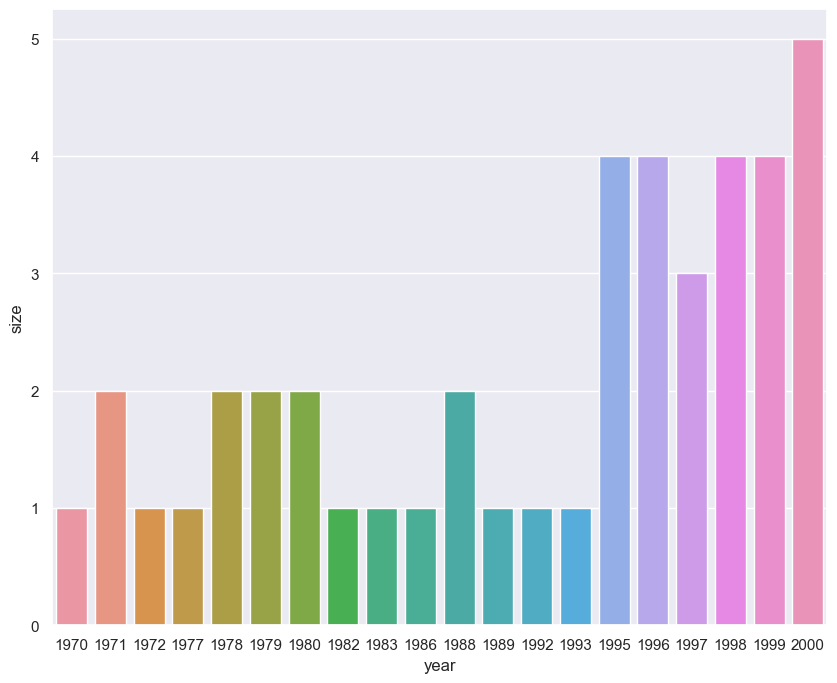

In [218]:
sns.barplot(x = "year", y = "size",data=per_year.head(20))